# Entertainer Data Analysis

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df1 = pd.read_csv('Entertainer - Basic Info.csv')
df2 = pd.read_csv('Entertainer - Breakthrough Info.csv')
df3 = pd.read_csv('Entertainer - Last work Info.csv')

In [8]:
mer_df = pd.merge(df1, df2, how='left')

In [9]:
mer_data = pd.merge(mer_df,df3, how = 'left')
mer_data.head(20)

,Entertainer,Gender (traditional),Birth Year,Year of Breakthrough/#1 Hit/Award Nomination,Breakthrough Name,Year of First Oscar/Grammy/Emmy,Year of Last Major Work (arguable),Year of Death
0,Adele,F,1988,2008,19,2009.0,2016,NaN
1,Angelina Jolie,F,1975,1999,"Girl, Interrupted",1999.0,2016,NaN
2,Aretha Franklin,F,1942,1967,I Never Loved a Man (The Way I Love You),1968.0,2014,NaN
3,Bette Davis,F,1908,1934,Of Human Bondage,1935.0,1989,1989.0
4,Betty White,F,1922,1952,Life with Elilzabeth,1976.0,2016,NaN
5,Bing Crosby,M,1903,1931,Several Songs,1962.0,1974,1977.0
6,Bob Hope,M,1903,1938,The Big Broadcast of 1938,1940.0,1972,2003.0
7,Carol Burnett,F,1933,1959,The Garry Moore Show,1962.0,2016,NaN
8,Carole Lombard,F,1908,1934,Twentieth Century,NaN,1942,1942.0
9,Carrie Fisher,F,1956,1977,Star Wars,NaN,2016,2016.0


# Explanatory Data Analysis

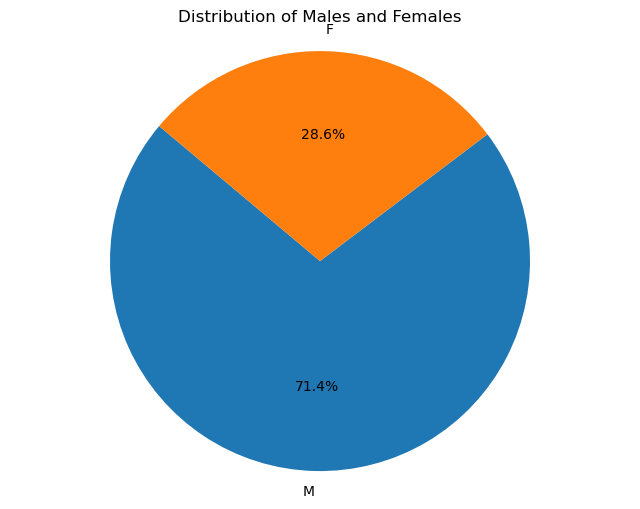

In [56]:
# Vizualization of number of males and females in the field of entertainment
gender_counts = mer_data['Gender (traditional)'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Males and Females')
plt.axis('equal') 
plt.show()

In [81]:
numerical_columns = mer_data.select_dtypes(include=['number'])
numerical_columns.corr()

,Birth Year,Year of Breakthrough/#1 Hit/Award Nomination,Year of First Oscar/Grammy/Emmy,Year of Last Major Work (arguable),Year of Death
Birth Year,1.000000,0.941740,0.772863,0.723677,0.561124
Year of Breakthrough/#1 Hit/Award Nomination,0.941740,1.000000,0.842745,0.748675,0.511714
Year of First Oscar/Grammy/Emmy,0.772863,0.842745,1.000000,0.608658,0.360906
Year of Last Major Work (arguable),0.723677,0.748675,0.608658,1.000000,0.848694
Year of Death,0.561124,0.511714,0.360906,0.848694,1.000000


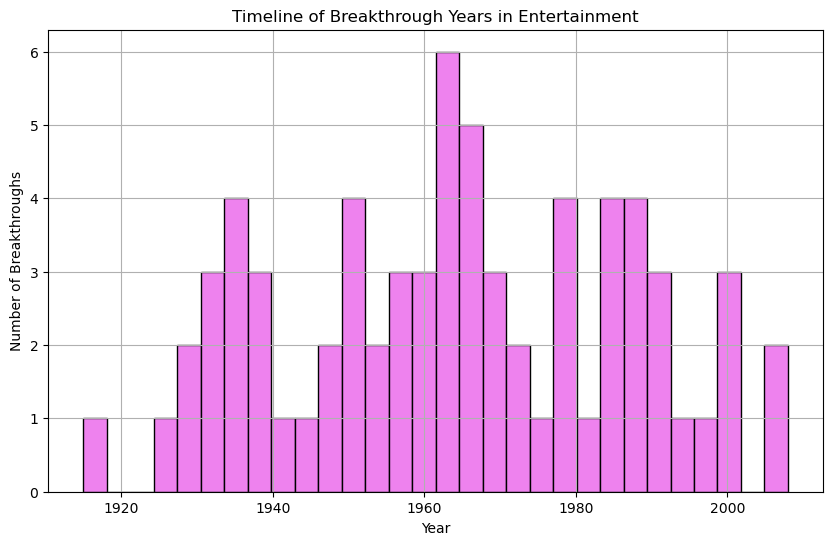

In [33]:
# visualizing the trending period of entertainment from this dataset
plt.figure(figsize=(10, 6))
plt.hist(mer_data['Year of Breakthrough/#1 Hit/Award Nomination'], bins=30, color='violet', edgecolor='black')
plt.title('Timeline of Breakthrough Years in Entertainment')
plt.xlabel('Year')
plt.ylabel('Number of Breakthroughs')
plt.grid(True)
plt.show()

# during the period of 1960-70, entertainment was the trending the most

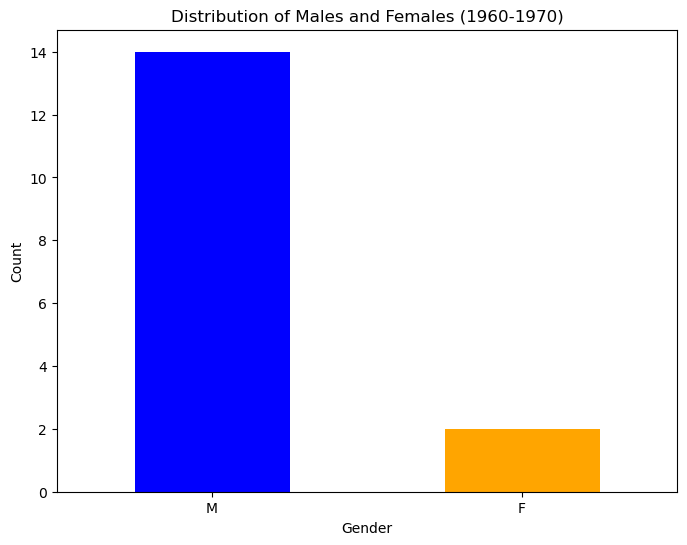

In [39]:
filtered_df = mer_data[(mer_data['Year of Breakthrough/#1 Hit/Award Nomination'] >= 1960) & (mer_data['Year of Breakthrough/#1 Hit/Award Nomination'] <= 1970)]
gender_counts = filtered_df['Gender (traditional)'].value_counts()
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Males and Females (1960-1970)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.show()

# During this trending period, the number of male entertainer is high

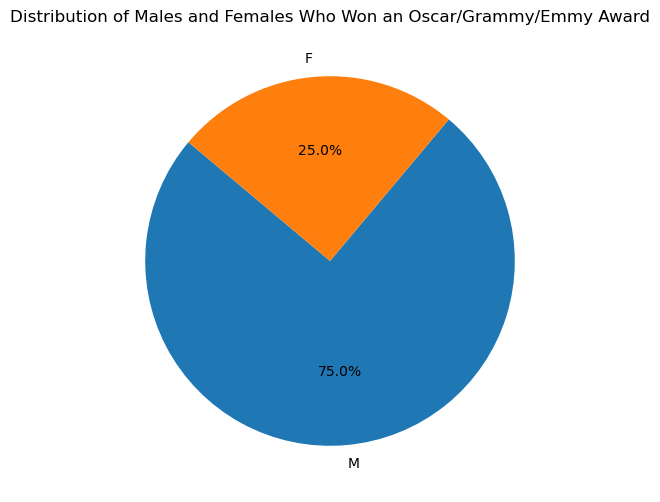

In [58]:
modified_df = mer_data.copy()
modified_df['Year of First Oscar/Grammy/Emmy'] = modified_df['Year of First Oscar/Grammy/Emmy'].notna().astype(int)
winners_df = modified_df[modified_df['Year of First Oscar/Grammy/Emmy'] == 1]
gender_counts = winners_df['Gender (traditional)'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Males and Females Who Won an Oscar/Grammy/Emmy Award')
plt.show()

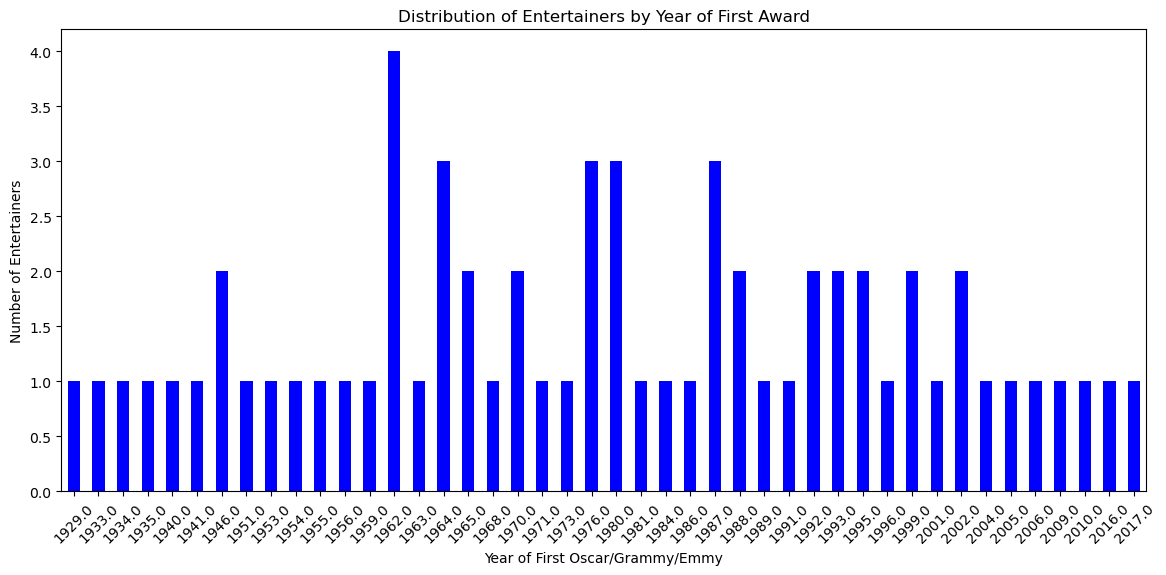

In [85]:
# Visualize the year in which maximum number of Oscar was won by Entertainers
award_year_counts = mer_data['Year of First Oscar/Grammy/Emmy'].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(14, 6))
award_year_counts.plot(kind='bar', color='blue')
plt.title('Distribution of Entertainers by Year of First Award')
plt.xlabel('Year of First Oscar/Grammy/Emmy')
plt.ylabel('Number of Entertainers')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

# In 1962 the Oscar award were awarded to maximum number of entertainers 

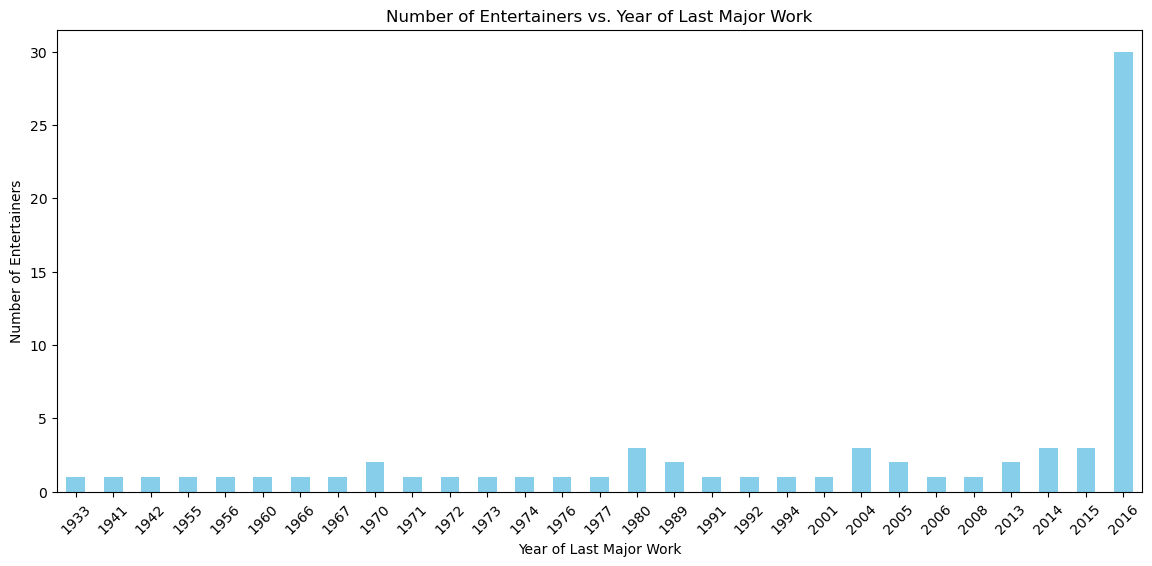

In [72]:
# visualizing  the relationship between entertainers and their Year of Last Major Work (arguable).
year_counts = mer_data['Year of Last Major Work (arguable)'].value_counts().sort_index()
plt.figure(figsize=(14, 6))
year_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Entertainers vs. Year of Last Major Work')
plt.xlabel('Year of Last Major Work')
plt.ylabel('Number of Entertainers')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

# Most of the entertainer's last work is in the year 2016

In [79]:
alive_df = mer_data.copy()
alive_df['Year of Death'].fillna('Alive', inplace=True)
num_alive = (alive_df['Year of Death'] == 'Alive').sum()
print("Number of entertainers who are still alive:", num_alive)

Number of entertainers who are still alive: 40


/tmp/ipykernel_3979/2298961232.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Alive' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  alive_df['Year of Death'].fillna('Alive', inplace=True)


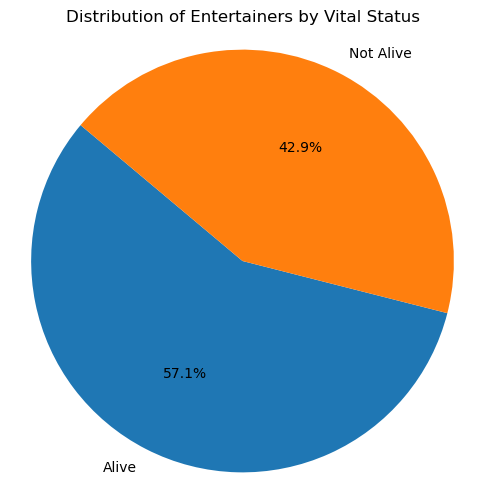

In [80]:
# visualizing the graph of entertainers who are alive

alive_df = mer_data.copy()  # Make a copy to avoid modifying the original DataFrame
alive_df['Vital Status'] = alive_df['Year of Death'].apply(lambda x: 'Alive' if pd.isnull(x) else 'Not Alive')

# Count the number of entertainers in each vital status category
vital_status_counts = alive_df['Vital Status'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(vital_status_counts, labels=vital_status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Entertainers by Vital Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()